<a href="https://colab.research.google.com/github/Manasi758/TCS-iON--HR-Salary-Dashboard-Train-the-dataset-and-predict-the-salary/blob/main/Interim_report_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:


#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#reading dataset 
data=pd.read_csv("/content/drive/MyDrive/salarydata.csv")
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  32561 non-null  object
 13  salary          32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


In [ ]:
data.shape


(32561, 14)

In [ ]:
data.isna().sum()


age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

While analyzing the dataset, it is clear that capital-gain & capital_loss have no significance in salary prediction. so we can drop it. The column,education-num is the numerical version of the column education, so we also drop it.

In [ ]:
data.drop(['capital-gain','capital-loss','education-num'], axis = 1,inplace = True)
data.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


In [ ]:
# Found '?' in columns occupation, workclass, and native-country
data['workclass'].mode()

0    Private
dtype: object

In [ ]:
data['occupation'].mode()

0    Prof-specialty
dtype: object

In [ ]:
data['native-country'].mode()

0    United-States
dtype: object

In [ ]:
data['workclass'] = data['workclass'].replace('?','Private')
data['occupation']=data['occupation'].replace('?','Prof-speciality')
data['native-country']=data['native-country'].replace('?','United-States')
data[data['salary']=='?']

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary


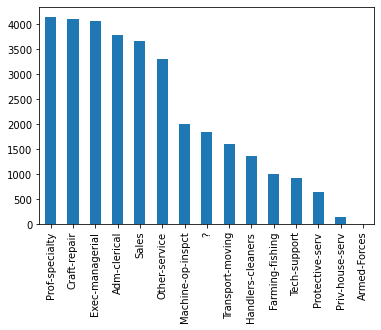

In [ ]:
#checking whether the records that contains
#the question mark '?' have being removed

#checking occupation

data['occupation'].value_counts().plot(kind = 'bar')
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

**OUTLIER HANDLING**

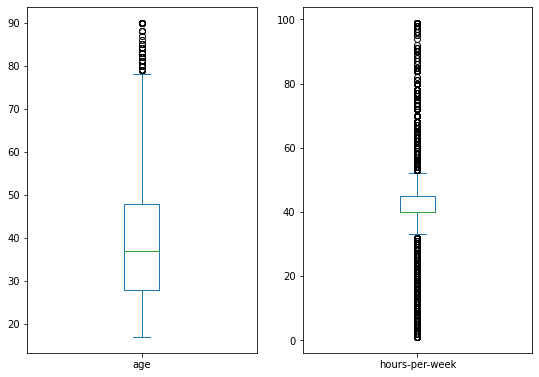

In [ ]:
data.plot(kind='box',subplots=True,layout=(2,3),figsize=(14,14));


From the figure it is clear that age and hours-per-week have outliers. So we should remove it.

In [ ]:
##Outlier handling of age and hours-per-week##

Q1=np.percentile(data['age'],25,interpolation='midpoint')
Q2=np.percentile(data['age'],50,interpolation='midpoint')
Q3=np.percentile(data['age'],75,interpolation='midpoint')
IQR=Q3-Q1

low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR

outlier=[]

for x in data['age']:
 if((x>up_limit) or (x<low_limit)):
   outlier.append(x)
indA=data['age']>up_limit
indA1=data.loc[indA].index
data.drop(indA1,inplace=True)
indB=data['age']<low_limit
indB1=data.loc[indB].index
data.drop(indB1,inplace=True)
Q1=np.percentile(data['hours-per-week'],25,interpolation='midpoint')
Q2=np.percentile(data['hours-per-week'],50,interpolation='midpoint')
Q3=np.percentile(data['hours-per-week'],75,interpolation='midpoint')
IQR=Q3-Q1

low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR



for x in data['hours-per-week']:
 if((x>up_limit) or (x<low_limit)):
    outlier.append(x)

indA=data['hours-per-week']>up_limit
indA1=data.loc[indA].index

data.drop(indA1,inplace=True)

indB=data['hours-per-week']<low_limit
indB1=data.loc[indB].index

data.drop(indB1,inplace=True)

<ipython-input-10-0a9cbaaeade1>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1=np.percentile(data['age'],25,interpolation='midpoint')
<ipython-input-10-0a9cbaaeade1>:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q2=np.percentile(data['age'],50,interpolation='midpoint')
<ipython-input-10-0a9cbaaeade1>:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3=np.percentile(data['age

Text(0.5, 1.0, 'Box plot of age after removal of outlier')

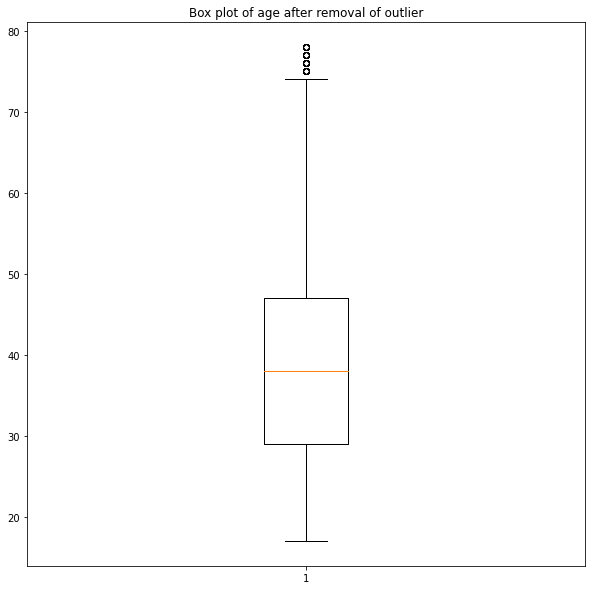

In [ ]:
plt.boxplot(data['age'])
plt.title('Box plot of age after removal of outlier')

Text(0.5, 1.0, 'Box plot of hours-per-week after removal of outlier')

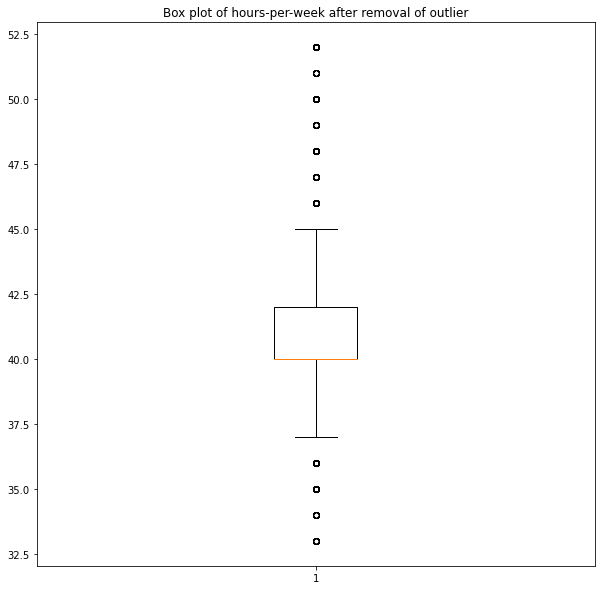

In [ ]:
plt.boxplot(data['hours-per-week'])
plt.title('Box plot of hours-per-week after removal of outlier')